## EDA

In [19]:
import pandas as pd

### sale_data

In [20]:
df_sales = pd.read_csv('../data/sale_data.csv')

In [21]:
df_sales.head()

,order_id,customer_id,product_id,store_id,quantity,unit_price,date
0,1,1266.0,2007,S05,4,1573,2025-08-01
1,2,1199.0,2005,S04,1,1909,2025-08-01
2,3,1055.0,2008,S01,2,1834,2025-08-01
3,4,1121.0,2001,S03,5,1722,2025-08-01
4,5,1116.0,2005,S04,1,1909,2025-08-01


In [22]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     1000 non-null   int64  
 1   customer_id  900 non-null    float64
 2   product_id   1000 non-null   int64  
 3   store_id     1000 non-null   object 
 4   quantity     1000 non-null   object 
 5   unit_price   1000 non-null   int64  
 6   date         1000 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 54.8+ KB


In [23]:
df_sales['quantity'].value_counts()

quantity
3          206
4          193
1          190
2          190
5          188
invalid     33
Name: count, dtype: int64

In [24]:
df_sales.isnull().sum()

order_id         0
customer_id    100
product_id       0
store_id         0
quantity         0
unit_price       0
date             0
dtype: int64

In [25]:
df_sales.describe()

,order_id,customer_id,product_id,unit_price
count,1000.000000,900.000000,1000.000000,1000.00000
mean,500.500000,1242.174444,2005.560000,1373.67700
std,288.819436,144.525435,2.855969,565.02779
min,1.000000,1000.000000,2001.000000,221.00000
25%,250.750000,1122.500000,2003.000000,1341.00000
50%,500.500000,1240.500000,2005.000000,1573.00000
75%,750.250000,1371.000000,2008.000000,1722.00000
max,1000.000000,1500.000000,2010.000000,1909.00000


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
sns.set_style("whitegrid")

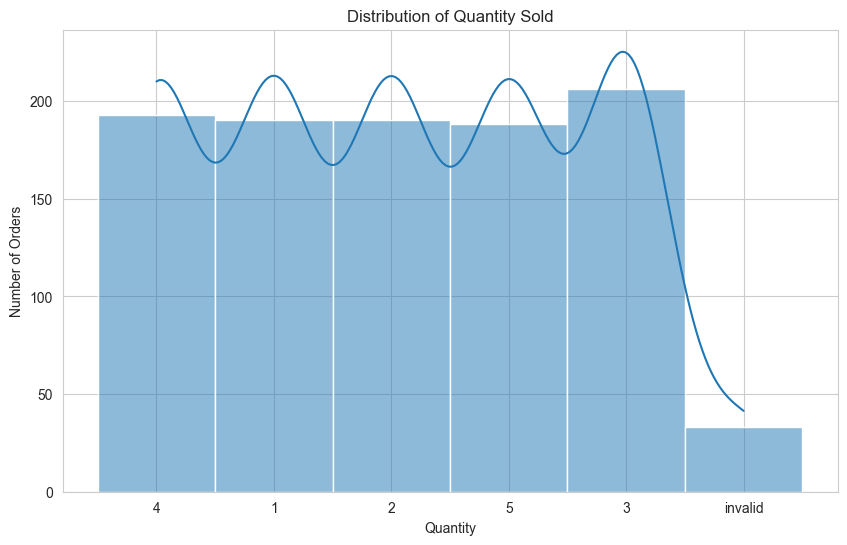

กราฟ Distribution of Quantity Sold แสดงการกระจายตัวของปริมาณสินค้าที่ถูกสั่งซื้อ


In [28]:
# การกระจายของ quantity
plt.figure(figsize=(10, 6))
sns.histplot(df_sales['quantity'], bins=20, kde=True)
plt.title('Distribution of Quantity Sold')
plt.xlabel('Quantity')
plt.ylabel('Number of Orders')
plt.show()
print("กราฟ Distribution of Quantity Sold แสดงการกระจายตัวของปริมาณสินค้าที่ถูกสั่งซื้อ")

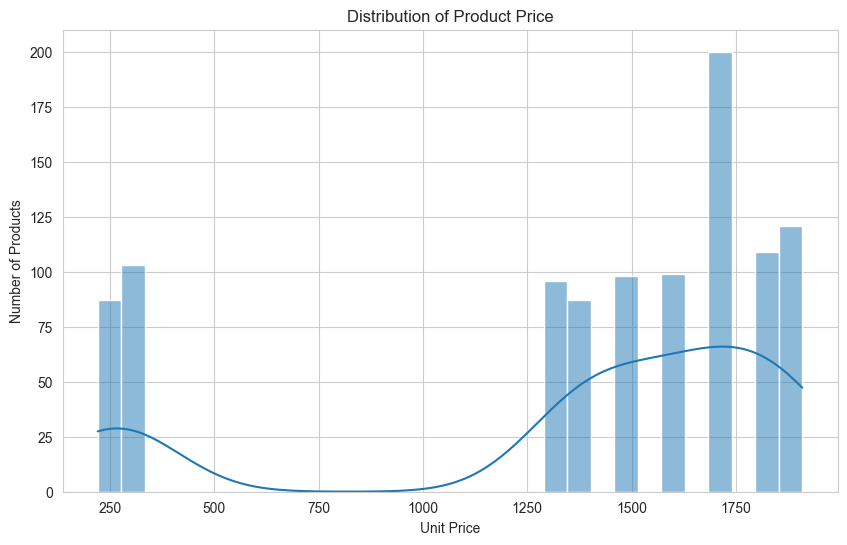

กราฟ Distribution of Product Price แสดงการกระจายตัวของราคาสินค้า


In [29]:
# --- 2. การกระจายตัวของ Price ---
plt.figure(figsize=(10, 6))
sns.histplot(df_sales['unit_price'], bins=30, kde=True)
plt.title('Distribution of Product Price')
plt.xlabel('Unit Price')
plt.ylabel('Number of Products')
plt.show()
print("กราฟ Distribution of Product Price แสดงการกระจายตัวของราคาสินค้า")

/var/folders/3k/fqg53q2n0bd9hx54w4nfl51c0000gn/T/ipykernel_56186/1657595920.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='product_id', y='unit_price', data=top_products, palette='viridis')


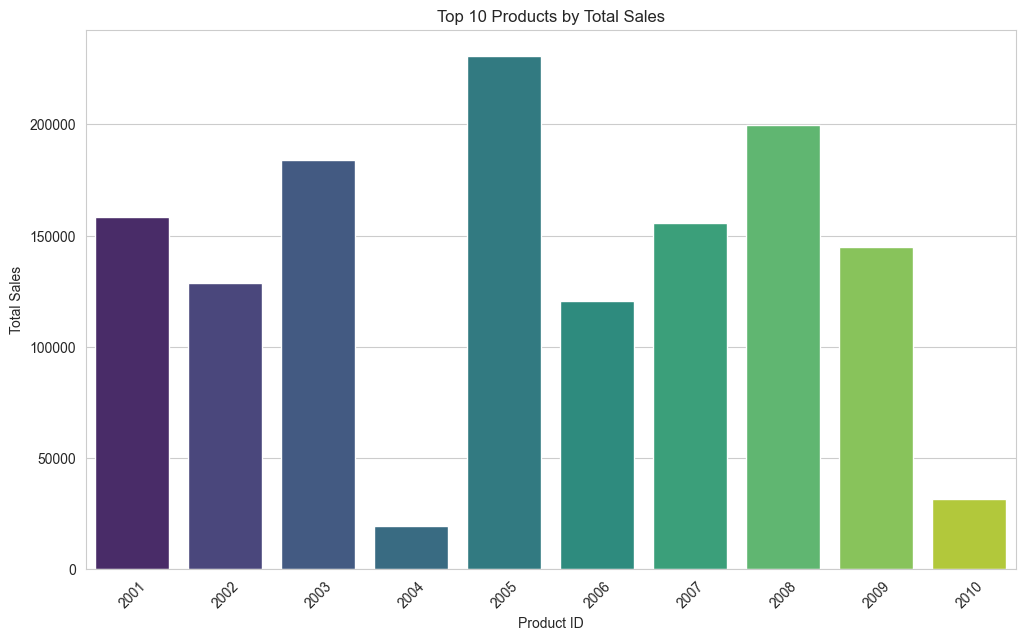

กราฟ Top 10 Products by Total Sales แสดงสินค้า 10 อันดับแรกที่มียอดขายรวมสูงสุด


In [30]:
top_products = df_sales.groupby('product_id')['unit_price'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 7))
sns.barplot(x='product_id', y='unit_price', data=top_products, palette='viridis')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Product ID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()
print("กราฟ Top 10 Products by Total Sales แสดงสินค้า 10 อันดับแรกที่มียอดขายรวมสูงสุด")